# Problem 1 - EU Cities Temperatures (55 pts)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('EuCitiesTemperatures.csv')
df.head()

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79


## Preprocessing/Analysis (28 pts)

1. [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [3]:
lat = {}
long = {}
avglat = {}
avglong = {}
for index, row in df.iterrows():
    if row['country'] in lat:
        lat[row['country']].append(row['latitude'])
    else:
        lat[row['country']] = [row['latitude']]
    if row['country'] in long:
        long[row['country']].append(row['longitude'])
    else:
        long[row['country']] = [row['longitude']]
for keys in lat:
    lsum = 0
    length = 0
    for x in lat[keys]:
        if not (np.isnan(x)):
            lsum += x
            length += 1
    avg = lsum/length
    avg = round(avg, 2)
    avglat[keys] = avg
for keys in long:
    lsum = 0
    length = 0
    for x in long[keys]:
        if not (np.isnan(x)):
            lsum += x
            length += 1
    avg = lsum/length
    avg = round(avg, 2)
    avglong[keys] = avg
for index, row in df.iterrows():
    if np.isnan(row['latitude']):
        country = row['country']
        df.at[index,'latitude'] = avglat[country]
    if np.isnan(row['longitude']):
        country = row['country']
        df.at[index,'longitude'] = avglong[country]

2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [7]:
countr = {}
cities = []
for index, row in df.iterrows():
    if row['latitude'] >= 40 and row['latitude'] <= 60 and row['longitude'] >= 15 and row['longitude'] <= 30:
        cities.append(row['city'])
        if row['country'] in countr:
            countr[row['country']] += 1
        else:
            countr[row['country']] = 1
countr = sorted(countr.items(), key = lambda kv:kv[1],reverse = True)
print("Subset of cities that lie between latitudes 40-60 and longitudes 15-30: ")
print(cities)
print("\nCountries with maximum number of cities in this band: ")
for i in range(0, len(countr)-1):
    if countr[i][1] == countr[i+1][1]:
        print(countr[i][0])
        print(countr[i+1][0])
        continue
    else:
        break

Subset of cities that lie between latitudes 40-60 and longitudes 15-30: 
['Elbasan', 'Vienna', 'Minsk', 'Orsha', 'Pinsk', 'Brest', 'Hrodna', 'Mazyr', 'Plovdiv', 'Burgas', 'Pleven', 'Ruse', 'Stara Zagora', 'Split', 'Brno', 'Ostrava', 'Tartu', 'Tallinn', 'Budapest', 'Debrecen', 'Gyor', 'Szeged', 'Bari', 'Foggia', 'Daugavpils', 'Riga', 'Klaipeda', 'Kaunas', 'Vilnius', 'Skopje', 'Balti', 'Chisinau', 'Podgorica', 'Bialystok', 'Bydgoszcz', 'Bytom', 'Elblag', 'Kielce', 'Koszalin', 'Poznan', 'Wroclaw', 'Warsaw', 'Botosani', 'Braila', 'Bucharest', 'Craiova', 'Sibiu', 'Arad', 'Bacau', 'Baia Mare', 'Constanta', 'Belgrade', 'Nis', 'Novi Sad', 'Bratislava', 'Kosice', 'MalmÃ¶', 'Uppsala', 'Bursa', 'Edirne', 'Tekirdag', 'Chernivtsi', 'Rivne']

Countries with maximum number of cities in this band: 
Poland
Romania


3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).

In [8]:
regiontemp = {}
avgtemp = {}
for index, row in df.iterrows():
    if 'EYCY' in regiontemp and row['EU'] == 'yes' and row['coastline'] == 'yes':
        regiontemp['EYCY'].append(row['temperature'])
    elif row['EU'] == 'yes' and row['coastline'] == 'yes':
        regiontemp['EYCY'] = [row['temperature']]
    if 'EYCN' in regiontemp and row['EU'] == 'yes' and row['coastline'] == 'no':
        regiontemp['EYCN'].append(row['temperature'])
    elif row['EU'] == 'yes' and row['coastline'] == 'no':
        regiontemp['EYCN'] = [row['temperature']]
    if 'ENCY' in regiontemp and row['EU'] == 'no' and row['coastline'] == 'yes':
        regiontemp['ENCY'].append(row['temperature'])
    elif row['EU'] == 'no' and row['coastline'] == 'yes':
        regiontemp['ENCY'] = [row['temperature']]
    if 'ENCN' in regiontemp and row['EU'] == 'no' and row['coastline'] == 'no':
        regiontemp['ENCN'].append(row['temperature'])
    elif row['EU'] == 'no' and row['coastline'] == 'no':
        regiontemp['ENCN'] = [row['temperature']]
for keys in regiontemp:
    lsum = 0
    length = 0
    for x in regiontemp[keys]:
        if not np.isnan(x):
            lsum += x
            length += 1
    avg = lsum/length
    avgtemp[keys] = avg
for index, row in df.iterrows():
    if np.isnan(row['temperature']) and row['EU'] == 'yes' and row['coastline'] == 'yes':
        df.at[index,'temperature'] = avgtemp['EYCY']
    if np.isnan(row['temperature']) and row['EU'] == 'yes' and row['coastline'] == 'no':
        df.at[index,'temperature'] = avgtemp['EYCN']
    if np.isnan(row['temperature']) and row['EU'] == 'no' and row['coastline'] == 'yes':
        df.at[index,'temperature'] = avgtemp['ENCY']
    if np.isnan(row['temperature']) and row['EU'] == 'no' and row['coastline'] == 'no':
        df.at[index,'temperature'] = avgtemp['ENCN']

## Visualization (27 pts)

1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

In [9]:
import matplotlib.pyplot as plt

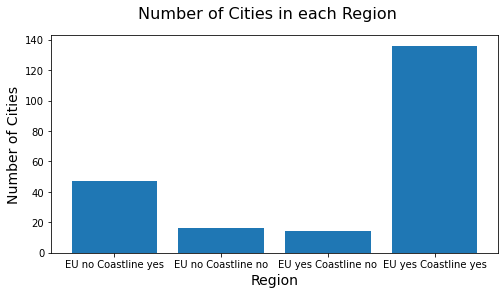

In [10]:
regioncities = {}
for index, row in df.iterrows():
    if row['EU'] == 'yes' and row['coastline'] == 'yes':
        if 'EU yes Coastline yes' in regioncities:
            regioncities['EU yes Coastline yes'] += 1
        else:
            regioncities['EU yes Coastline yes'] = 1
    elif row['EU'] == 'yes' and row['coastline'] == 'no':
        if 'EU yes Coastline no' in regioncities:
            regioncities['EU yes Coastline no'] += 1
        else:
            regioncities['EU yes Coastline no'] = 1
    elif row['EU'] == 'no' and row['coastline'] == 'yes':
        if 'EU no Coastline yes' in regioncities:
            regioncities['EU no Coastline yes'] += 1
        else:
            regioncities['EU no Coastline yes'] = 1
    elif row['EU'] == 'no' and row['coastline'] == 'no':
        if 'EU no Coastline no' in regioncities:
            regioncities['EU no Coastline no'] += 1
        else:
            regioncities['EU no Coastline no'] = 1
k = regioncities.keys()
v = regioncities.values()
fig = plt.figure()
plt.xlabel('Region', fontsize = 14)
plt.ylabel('Number of Cities', fontsize = 14)
fig.suptitle('Number of Cities in each Region', fontsize = 16)
fig.set_figwidth(8)
plt.bar(k, v)
plt.show()

2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

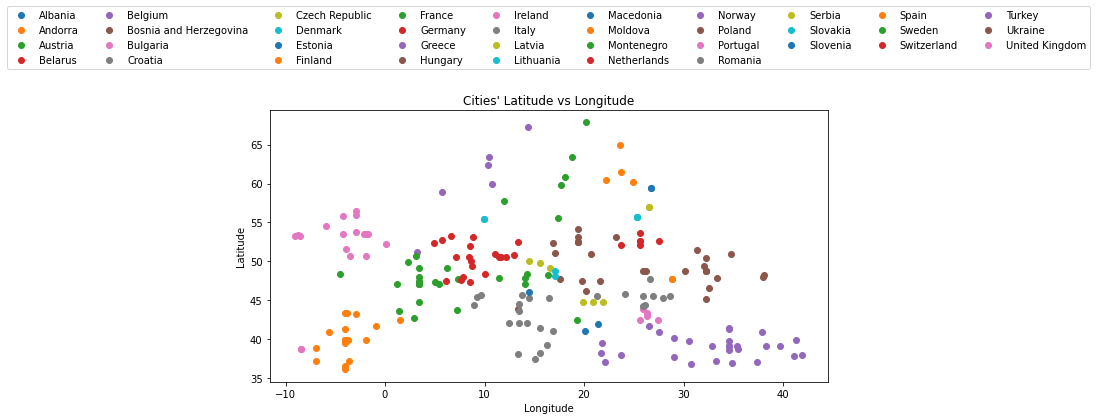

In [11]:
groups = df.groupby('country')
plt.figure(figsize=(10,5))
for name, group in groups:
    plt.plot(group['longitude'],group['latitude'], marker = 'o', linestyle = '', label = name)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.40),ncol= 10)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title("Cities' Latitude vs Longitude")
plt.show()

3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

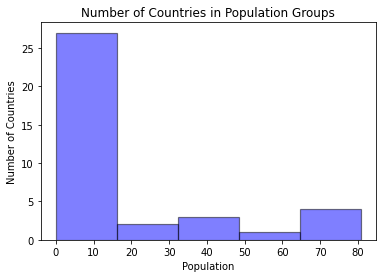

In [12]:
pop = {}
for index, row in df.iterrows():
    if row['country'] in pop:
        continue
    else:
        pop[row['country']] = row['population']
pop = sorted(pop.items(), key = lambda kv:kv[1])
x = []
for i in range(0, len(pop)):
    x.append(pop[i][1])
n, bins, patches = plt.hist(x,bins = 5,facecolor = 'blue',alpha=0.5,edgecolor='black',linewidth=1.2)
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.title('Number of Countries in Population Groups')
plt.show()

4. [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

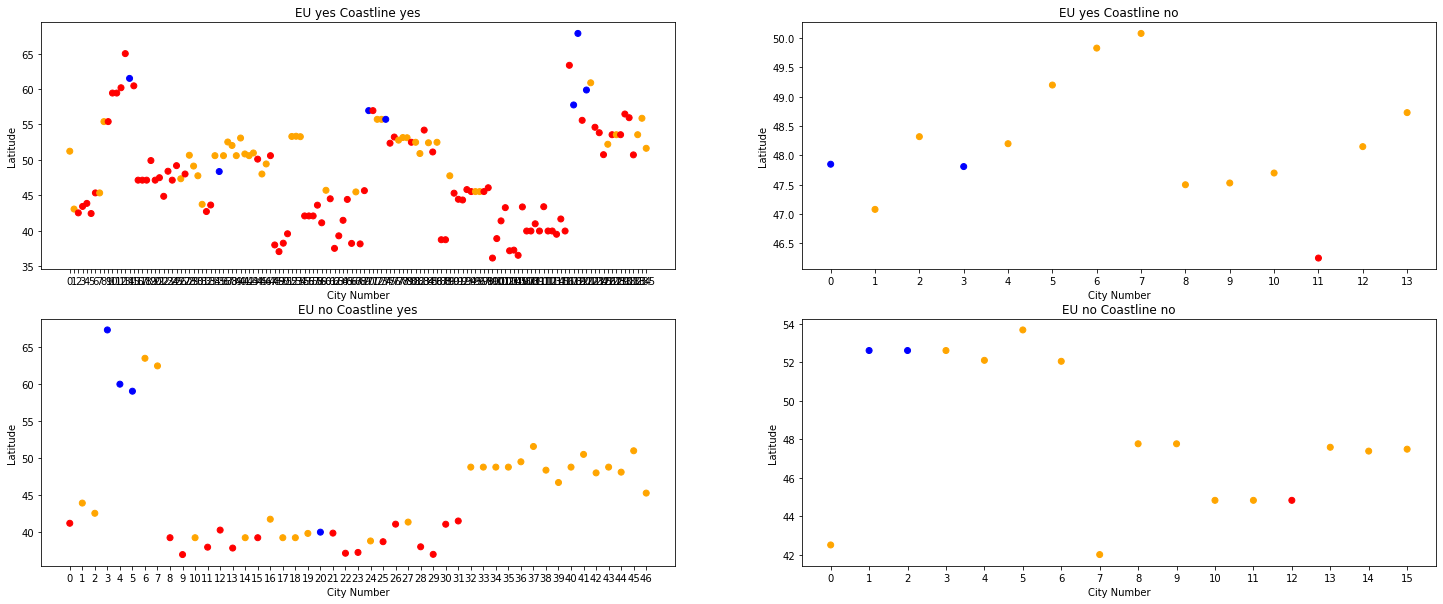

In [13]:
EYCY = {}
EYCN = {}
ENCY = {}
ENCN = {}
c1 = []
c2 = []
c3 = []
c4 = []
for index, row in df.iterrows():
    if row['EU'] == 'yes' and row['coastline'] == 'yes':
        EYCY[row['city']] = row['latitude']
        if row['temperature'] > 10:
            c1.append('red')
        elif row['temperature'] < 6:
            c1.append('blue')
        else:
            c1.append('orange')
    elif row['EU'] == 'yes' and row['coastline'] == 'no':
        EYCN[row['city']] = row['latitude']
        if row['temperature'] > 10:
            c2.append('red')
        elif row['temperature'] < 6:
            c2.append('blue')
        else:
            c2.append('orange')
    elif row['EU'] == 'no' and row['coastline'] == 'yes':
        ENCY[row['city']] = row['latitude']
        if row['temperature'] > 10:
            c3.append('red')
        elif row['temperature'] < 6:
            c3.append('blue')
        else:
            c3.append('orange')
    elif row['EU'] == 'no' and row['coastline'] == 'no':
        ENCN[row['city']] = row['latitude']
        if row['temperature'] > 10:
            c4.append('red')
        elif row['temperature'] < 6:
            c4.append('blue')
        else:
            c4.append('orange')
fig, ax = plt.subplots(2,2,figsize=(25,10))
ax[0,0].scatter(np.arange(0,len(EYCY)),EYCY.values(),c = c1)
ax[0,0].set_title('EU yes Coastline yes')
ax[0,0].set_xlabel('City Number')
ax[0,0].set_ylabel('Latitude')
ax[0,1].scatter(np.arange(0,len(EYCN)),EYCN.values(),c = c2)
ax[0,1].set_title('EU yes Coastline no')
ax[0,1].set_xlabel('City Number')
ax[0,1].set_ylabel('Latitude')
ax[1,0].scatter(np.arange(0,len(ENCY)),ENCY.values(),c = c3)
ax[1,0].set_title('EU no Coastline yes')
ax[1,0].set_xlabel('City Number')
ax[1,0].set_ylabel('Latitude')
ax[1,1].scatter(np.arange(0,len(ENCN)),ENCN.values(),c = c4)
ax[1,1].set_title('EU no Coastline no')
ax[1,1].set_xlabel('City Number')
ax[1,1].set_ylabel('Latitude')
plt.sca(ax[0,0])
plt.xticks(np.arange(0,len(EYCY)))
plt.sca(ax[0,1])
plt.xticks(np.arange(0,len(EYCN)))
plt.sca(ax[1,0])
plt.xticks(np.arange(0,len(ENCY)))
plt.sca(ax[1,1])
plt.xticks(np.arange(0,len(ENCN)))
plt.show()